# combine different bands

In [4]:
import numpy as np
from ecog_band.datasetAllband import CombineBandDataset
from ecog_band.models import SVMBinClassifier, DecisionTreeBinClassifier, RandomForestBinClassifier, KNeighborsBinClassifier, GaussianNBBinClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from ecog_band.utils import *
from ecog_band.solver import Nfold_solver
import pandas as pd
# from ecog_band.datasetExcludeBand import CustomDatasetExcband

In [5]:
HS = 69
freq = 500
elec = 7
path_elec = f'/public/DATA/overt_reading/dataset_/HS{HS}/{freq}/{elec}'
y_save_path = f'/root/pp/covert-reading/Ecog_pretrain/accuracy_results_combine_norm/HS{HS}/{freq}/{elec}'
# contribution_save_path = f'/root/pp/covert-reading/Ecog_pretrain/Bclassification_results_ml_avg/HS{HS}/{freq}/{elec}'
band_list = get_all_band()
num_samples = len(os.listdir(path_elec))

os.makedirs(y_save_path, exist_ok=True)

data_shape: (720, 1500)


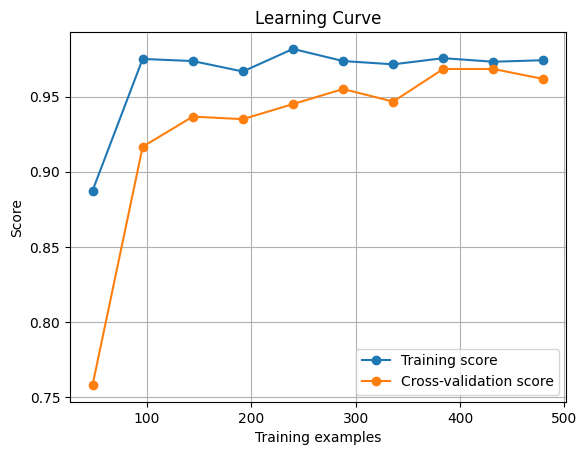

Accuracy on test set else1_delta: 0.9


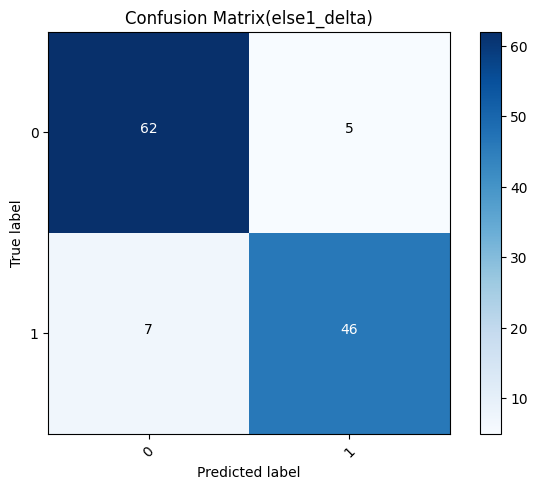

data_shape: (720, 1875)


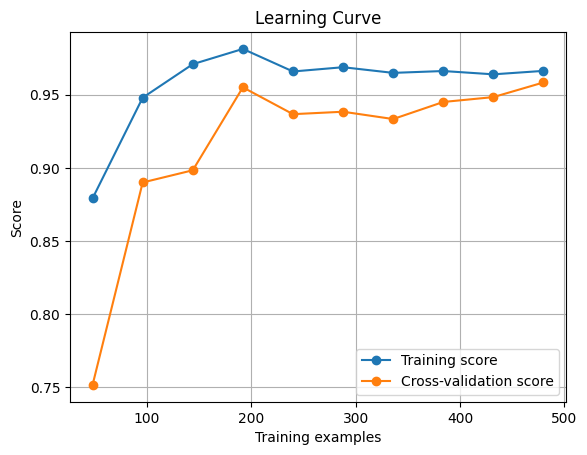

Accuracy on test set else1_theta: 0.9


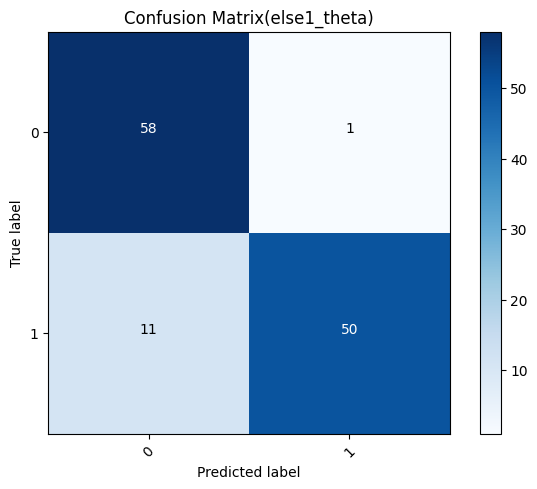

data_shape: (720, 1875)


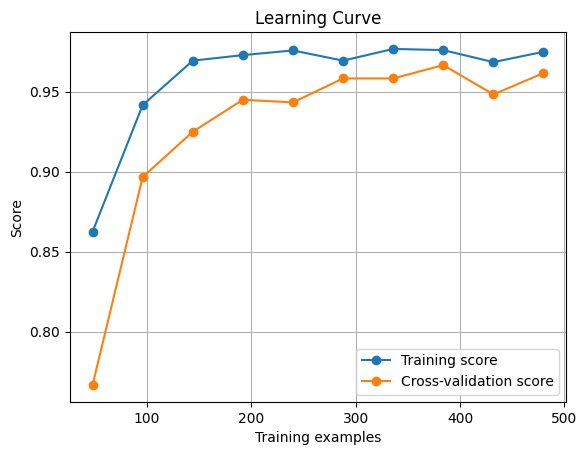

Accuracy on test set else1_alpha: 0.8833333333333333


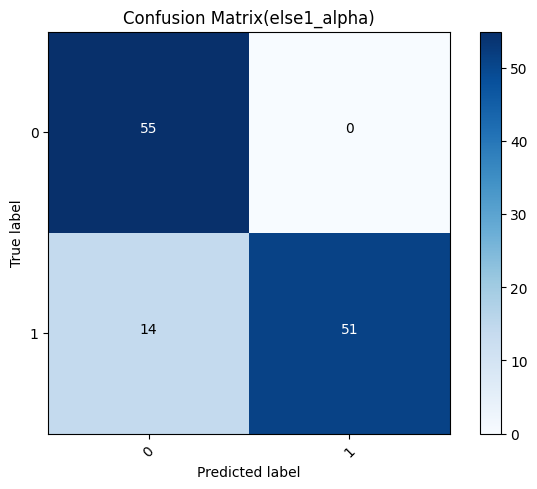

In [6]:
# classify test on combine two bands
seen_combinations = set()
unique_combinations = []
for bandi in band_list:
    for bandj in band_list:
        if bandi == bandj:
            continue
        # combo = tuple(sorted([bandi, bandj]))
        combo = (bandi, bandj)   
        # Create a set with the same elements but unordered
        reversed_combo = (bandj, bandi)
        if (combo not in seen_combinations) and (reversed_combo not in seen_combinations):
            seen_combinations.add(combo)
            unique_combinations.append(combo) 

            data_loader = CombineBandDataset(HS, path_elec, freq, elec, num_samples, [bandi, bandj])
            data, labels = data_loader.get_data_labels()
            print(f'data_shape: {data.shape}')
            X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=1/6, random_state=42)
            svm = DecisionTreeBinClassifier()
            svm.train(x_train=X_train, y_train=y_train)

            y_pred = svm.evaluate(X_test=X_test, y_test=y_test)
            band_acc = accuracy_score(y_test, y_pred)
            print(f"Accuracy on test set {bandi}_{bandj}: {band_acc}")

            np.save(os.path.join(y_save_path, f'{bandi}_{bandj}_y_pred.npy'), y_pred)
            np.save(os.path.join(y_save_path, f'{bandi}_{bandj}_y_true.npy'), y_test)
            # plt confusion matrix
            plt_confusion_matric(y_test, y_pred, f'{bandi}_{bandj}')
np.save(os.path.join(y_save_path, f'unique_combinations.npy'), unique_combinations)

In [1]:
# show accuracy for each band
from ecog_band.utils import pltbar_accuracy
accuracy = []
bands = []
unique_combinations = np.load(os.path.join(y_save_path, f'unique_combinations.npy'))
print(unique_combinations)
for band in unique_combinations:
    bandi, bandj = band
    bands.append(f'{bandi}_{bandj}')
    accuracy.append(cal_acc_band1_from_y(y_save_path, f'{bandi}_{bandj}'))
pltbar_accuracy(accuracy, bands)

/root/pp/covert-reading/Ecog_pretrain/ecog_band/solver.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm  # may raise warning about Jupyter


NameError: name 'unique_combinations' is not defined